# Function Approximation using Neural Networks

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
# create data
x = torch.unsqueeze(torch.linspace(-2, 2, 1000), dim=1)
y = x.pow(2)

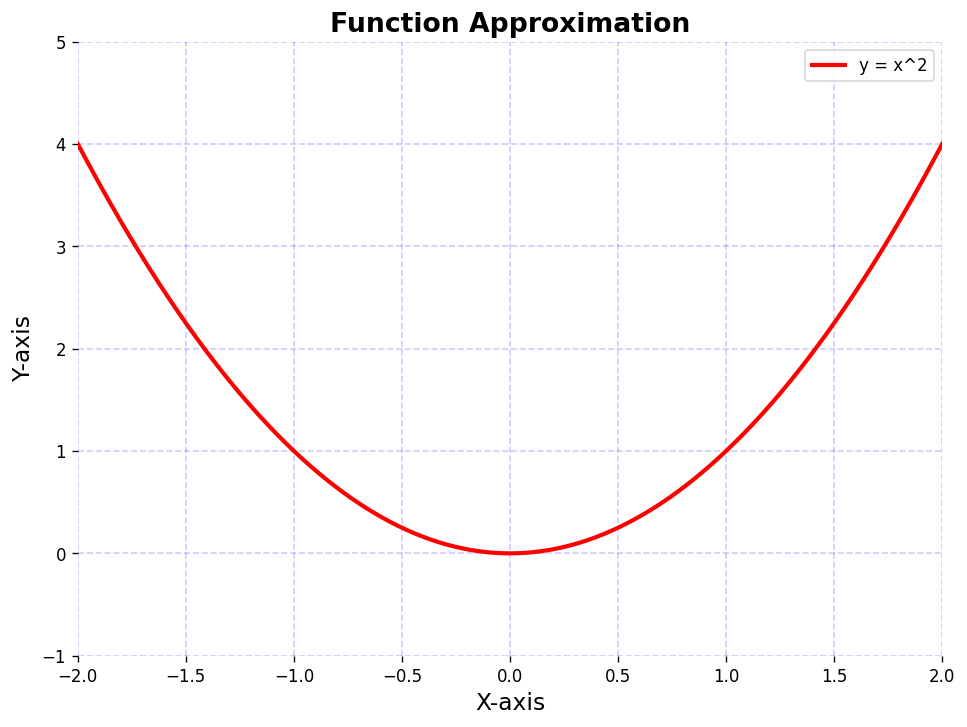

In [3]:
from implicitnet.plotting import plot_function

plot_function(x, y)